In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./core')
import Amiga
import Kalman
import util

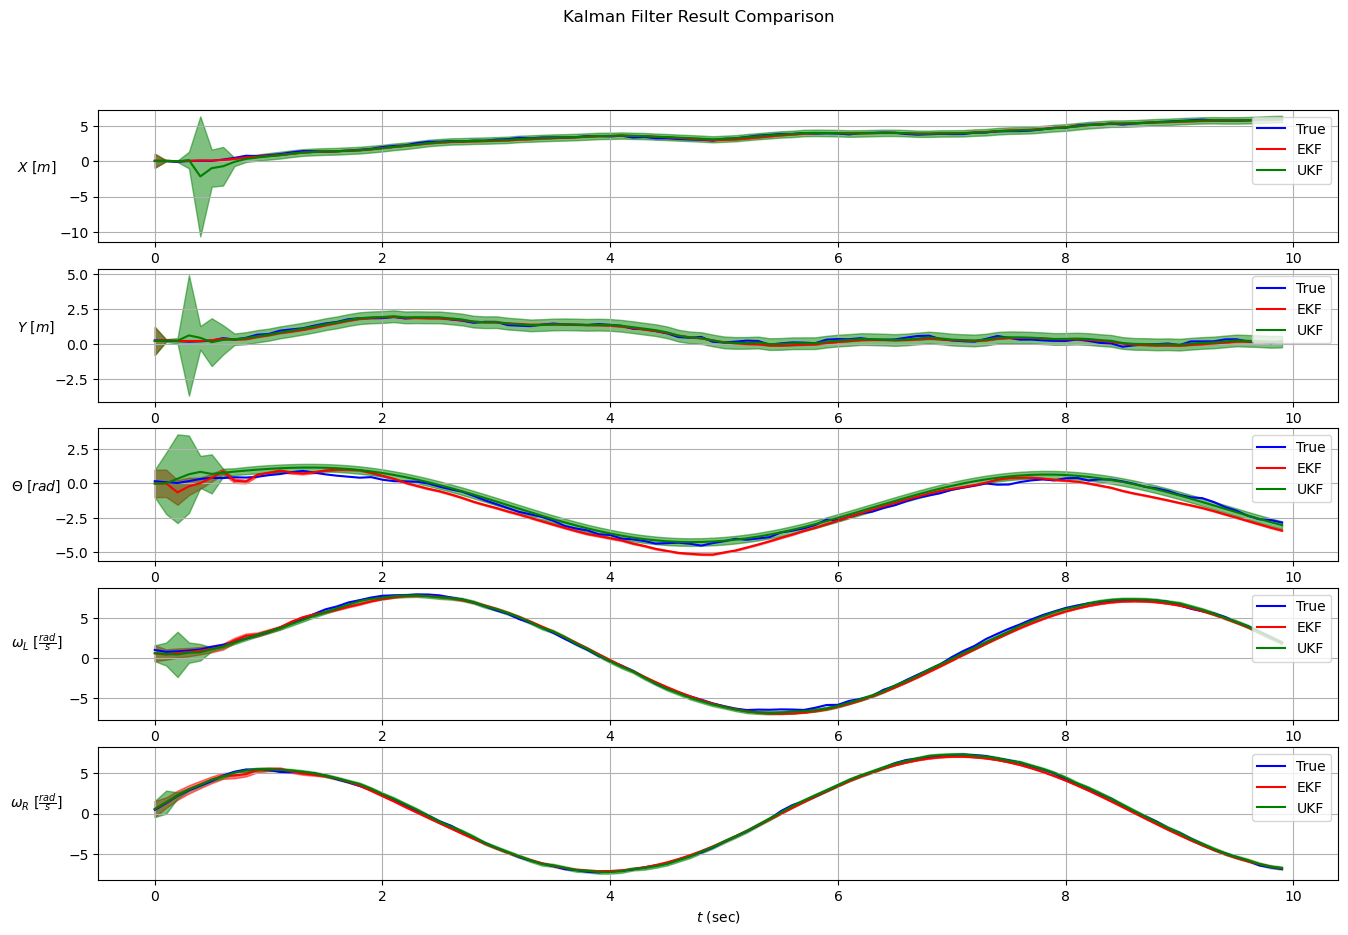

In [2]:

# model definition
model = Amiga.Amiga()
model.set_default()

# data generation
T = 100
x0 = np.random.rand(model.dimension.x,)
ts = np.linspace(0, 10, T)
u = 10 * np.array([np.sin(ts), np.cos(ts)]).T
xs, ys, us, ts = model.sample(T, x0=x0, u=u, noise=True)

# # KF
# KF = Kalman.KalmanFilter(model)
# xsKF, PsKF = KF.state_estimation(ys, us)[:2]

# EKF
EKF = Kalman.ExtendedKalmanFilter(model)
xsEKF, PsEKF = EKF.state_estimation(ys, us)[:2]

# UKF
UKF = Kalman.UnscentedKalmanFilter(model, resample=True)
xsUKF, PsUKF = UKF.state_estimation(ys, us)[:2]

# determinant of the covariance matrices
# detPsKF = np.zeros((T,), dtype=float)
detPsEKF = np.zeros((T,), dtype=float)
detPsUKF = np.zeros((T,), dtype=float)
for ii in range(T):
    # detPsKF[ii] = np.linalg.det(PsKF[ii, :, :])
    detPsEKF[ii] = np.linalg.det(PsEKF[ii, :, :])
    detPsUKF[ii] = np.linalg.det(PsUKF[ii, :, :])
    

# state trajectory comparison
state_labels = [r'$X$ [$m$]', r'$Y$ [$m$]', r'$\Theta$ [$rad$]', r'$\omega_L$ [$\frac{rad}{s}$]', r'$\omega_R$ [$\frac{rad}{s}$]']
plt.figure(figsize=(16, 10))
plt.suptitle('Kalman Filter Result Comparison')
for ii in range(model.dimension.x):
    ax = plt.subplot(model.dimension.x, 1, ii + 1)
    ax.yaxis.set_label_coords(-0.05, 1.0)  # move y label a bit to the left
    ax.plot(ts, xs[:, ii], color='b', label='True')
    util.plot_trajectory(ax, ts, xsEKF[:, ii], PsEKF[:, ii, ii], color='r', label='EKF', alpha=0.5)
    util.plot_trajectory(ax, ts, xsUKF[:, ii], PsUKF[:, ii, ii], color='g', label='UKF', alpha=0.5)
    ax.set_ylabel(state_labels[ii], rotation=0)
    ax.grid()
    ax.legend(loc='upper right')
    if ii == model.dimension.x - 1:
        ax.set_xlabel(r'$t$ (sec)')
plt.show()
print()

# # covariance matrix determinant
# plt.figure()
# # plt.loglog(ts, detPsKF, color='m', label='KF')
# plt.loglog(ts, detPsEKF, color='r', label='EKF')
# plt.loglog(ts, detPsUKF, color='g', label='UKF')
# plt.title('Determinant of Covariance Matrices')
# plt.grid()
# plt.legend(loc='best')
# plt.show()